# Make the graphs for paper
# OOV rate, ## rate by models

In [315]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
%matplotlib inline

In [263]:
df = pd.read_excel('OOVandShop.xlsx')
df.head()

,Unnamed: 0,task,vocab_size,tokenizer,source_len,tokenized_len,token_count,OOV_per_tokenized_sent,OOV_count,OOV_per_source_sent,##_per_tokenized_sent,##_count,##_per_source_sent,corpus_size,OOV rate,## rate
0,0,NIKL_CoLA,32K,WP,5.011,8.460,152251,0.033,189,0.163,10.523,62072,72.816,17996,0.124,40.770
1,1,NIKL_CoLA,64K,WP,5.011,7.429,133684,0.037,189,0.163,8.089,43505,51.651,17996,0.141,32.543
2,2,NIKL_CoLA,32K,WP-SD,5.011,7.844,141167,0.035,189,0.163,5.561,50988,60.110,17996,0.134,36.119
3,3,NIKL_CoLA,64K,WP-SD,5.011,7.229,130088,0.038,189,0.163,4.521,39909,47.572,17996,0.145,30.678
4,4,NIKL_CoLA,32K,MorWP,5.011,12.380,222794,0.020,216,0.181,1.690,10372,12.154,17996,0.097,4.655


In [325]:
# tokenizer명 수정
df['model'] = df['tokenizer'].apply(lambda x: re.sub('-\d\dK', '', x))
df.head()

,Unnamed: 0,task,vocab_size,tokenizer,source_len,tokenized_len,token_count,OOV_per_tokenized_sent,OOV_count,OOV_per_source_sent,##_per_tokenized_sent,##_count,##_per_source_sent,corpus_size,OOV rate,## rate,model
0,0,NIKL_CoLA,32K,WP,5.011,8.460,152251,0.033,189,0.163,10.523,62072,72.816,17996,0.124,40.770,WP
1,1,NIKL_CoLA,64K,WP,5.011,7.429,133684,0.037,189,0.163,8.089,43505,51.651,17996,0.141,32.543,WP
2,2,NIKL_CoLA,32K,WP-SD,5.011,7.844,141167,0.035,189,0.163,5.561,50988,60.110,17996,0.134,36.119,WP-SD
3,3,NIKL_CoLA,64K,WP-SD,5.011,7.229,130088,0.038,189,0.163,4.521,39909,47.572,17996,0.145,30.678,WP-SD
4,4,NIKL_CoLA,32K,MorWP,5.011,12.380,222794,0.020,216,0.181,1.690,10372,12.154,17996,0.097,4.655,MorWP


In [327]:
# df.to_excel('OOVandShop.xlsx')

In [148]:
# df = df.set_index(['task', 'tokenizer'])
# df.head()

In [326]:
df

,Unnamed: 0,task,vocab_size,tokenizer,source_len,tokenized_len,token_count,OOV_per_tokenized_sent,OOV_count,OOV_per_source_sent,##_per_tokenized_sent,##_count,##_per_source_sent,corpus_size,OOV rate,## rate,model
0,0,NIKL_CoLA,32K,WP,5.011,8.460,152251,0.033,189,0.163,10.523,62072,72.816,17996,0.124,40.770,WP
1,1,NIKL_CoLA,64K,WP,5.011,7.429,133684,0.037,189,0.163,8.089,43505,51.651,17996,0.141,32.543,WP
2,2,NIKL_CoLA,32K,WP-SD,5.011,7.844,141167,0.035,189,0.163,5.561,50988,60.110,17996,0.134,36.119,WP-SD
3,3,NIKL_CoLA,64K,WP-SD,5.011,7.229,130088,0.038,189,0.163,4.521,39909,47.572,17996,0.145,30.678,WP-SD
4,4,NIKL_CoLA,32K,MorWP,5.011,12.380,222794,0.020,216,0.181,1.690,10372,12.154,17996,0.097,4.655,MorWP
5,5,NIKL_CoLA,64K,MorWP,5.011,11.973,215462,0.021,216,0.181,0.508,3040,3.630,17996,0.100,1.411,MorWP
6,6,NIKL_CoLA,32K,MorWP-MD,5.011,12.214,219799,0.020,216,0.181,0.871,7377,8.710,17996,0.098,3.356,MorWP-MD
7,7,NIKL_CoLA,64K,MorWP-MD,5.011,11.917,214459,0.021,216,0.181,0.239,2037,2.420,17996,0.101,0.950,MorWP-MD
8,8,NIKL_CoLA,32K,MorWP-SD,5.011,12.207,219680,0.020,216,0.181,0.741,7258,8.578,17996,0.098,3.304,MorWP-SD
9,9,NIKL_CoLA,64K,MorWP-SD,5.011,11.914,214409,0.021,216,0.181,0.202,1987,2.357,17996,0.101,0.927,MorWP-SD


In [469]:
# x_order = ['WP', 'WP-SD', 'MorWP', 'MorWP-SD', 'MorWP-MD']
# subplot_order = ['KLUE-NLI', 'PAWS-X', 'NIKL_CoLA', 'KLUE-DP', 'NSMC', 'HSD']

# g = sns.catplot(data=df,
#                    x='model',
#                   y='OOV_per_tokenized_sent',
#                   col='task',
#                   hue='vocab_size',
#                    col_wrap=6,
#                    order=x_order,
#                     col_order = subplot_order,
#                    kind='bar',
#                   legend=False,
#                 palette='colorblind',
#                    size=5, aspect=1)
# # get datapoints
# for i in range(6):
#     ax = g.facet_axis(0,i)
#     for p in ax.patches:
#         ax.text(p.get_x() + 0.015, 
#                 p.get_height() * 1.02, 
#                 '{0:.2f}'.format(p.get_height()), 
#                 color='black', rotation='horizontal', size='large')


# g.set(ylim=(0.0, 1.0))
# g.set(ylabel='OOV rate per sentence(%)')
# g.set(xlabel='Model')
# plt.legend(loc='best')
# plt.show()
# g.savefig('OOV_token_rate.png')

/home/bongseok/.local/lib/python3.8/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


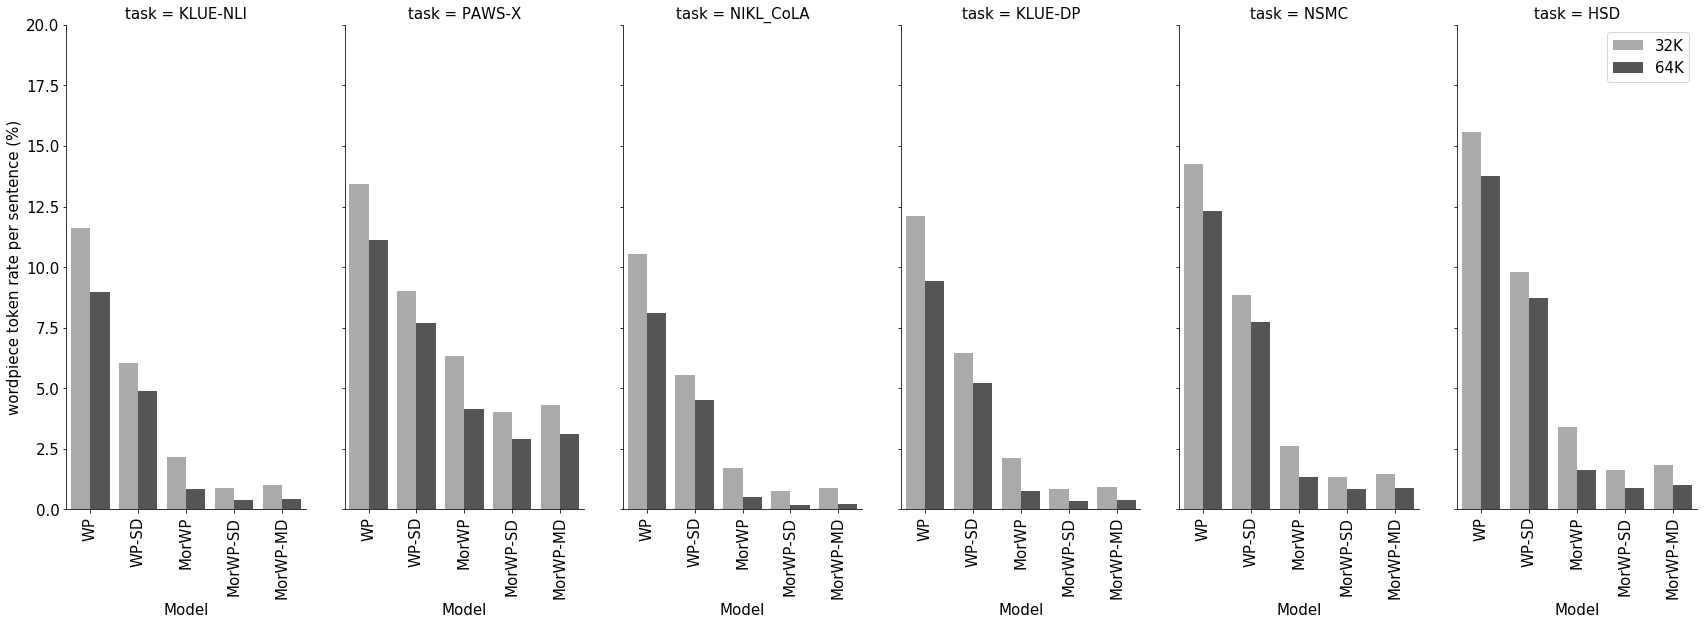

In [468]:
x_order = ['WP', 'WP-SD', 'MorWP', 'MorWP-SD', 'MorWP-MD']
subplot_order = ['KLUE-NLI', 'PAWS-X', 'NIKL_CoLA', 'KLUE-DP', 'NSMC', 'HSD']

with sns.plotting_context(font_scale=100):
    g = sns.catplot(data=df,
                       x='model',
                      y='##_per_tokenized_sent',
                      col='task',
                      hue='vocab_size',
                       col_wrap=6,
                       order=x_order,
                        col_order = subplot_order,
                       kind='bar',
                      legend=False,
                    palette='binary',
                    height=4,
                       size=8, aspect=0.5)
# get datapoints
# for i in range(6):
#     ax = g.facet_axis(0,i)
#     for p in ax.patches:
#         ax.text(p.get_x() + 0.015, 
#                 p.get_height() * 1.02, 
#                 '{0:.2f}'.format(p.get_height()), 
#                 color='black', rotation='horizontal', size='large')


g.set(ylim=(0.0, 20.0))
g.set(ylabel='wordpiece token rate per sentence (%)')
g.set(xlabel='Model')
g.set_xticklabels(ax.get_xticklabels(), rotation=90)


# plt.rc('font', size=15)
plt.legend(loc='best')
plt.show()
g.savefig('wordpiece_token_rate.png')

# table

In [380]:
df_32k = df[df['vocab_size']=='32K']
df_64k = df[df['vocab_size']=='64K']

In [387]:
df.groupby(['vocab_size', 'model']).mean()[['OOV rate', '## rate', 'tokenized_len']]

OOV rate    ## rate  tokenized_len
vocab_size model                                       
32K        MorWP     0.541500   9.306833      23.786833
           MorWP-MD  0.557000   7.242167      23.185333
           MorWP-SD  0.457333   7.211833      23.188000
           WP        0.586833  50.955333      19.277333
           WP-SD     0.520000  47.280833      17.968500
64K        MorWP     0.577333   4.811000      22.531667
           MorWP-MD  0.581167   4.262833      22.382833
           MorWP-SD  0.475000   4.288000      22.396000
           WP        0.677167  43.661167      16.771000
           WP-SD     0.572833  42.115167      16.336833

In [377]:
df_64k.groupby(['task','model']).mean()[['OOV rate', '## rate']].T

task        HSD                                   KLUE-DP                    \
model     MorWP MorWP-MD MorWP-SD      WP   WP-SD   MorWP MorWP-MD MorWP-SD   
OOV rate  0.524    0.525    0.524   0.520   0.524   1.046    1.051    1.051   
## rate   4.110    3.683    3.629  54.471  53.544   2.266    1.815    1.795   

task                      ...   NSMC                                    \
model         WP   WP-SD  ...  MorWP MorWP-MD MorWP-SD      WP   WP-SD   
OOV rate   1.298   1.338  ...  0.254    0.248    0.248   0.287   0.321   
## rate   38.289  36.389  ...  3.715    3.492    3.453  51.554  50.262   

task      PAWS-X                                    
model      MorWP MorWP-MD MorWP-SD      WP   WP-SD  
OOV rate   1.522    1.544    0.908   1.797   1.088  
## rate   14.946   13.716   14.016  47.929  46.615  

[2 rows x 30 columns]